## Distribució dades 

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text
import umap

In [23]:
df = pd.read_csv('/Users/carlabatlle/Documents/practiques/data/RNAseq_un_merged.csv')
df=df.set_index(df.columns[0])

# Filtrar gens amb expressió nul·la en totes les mostres
df_values = df.iloc[:, 1:-1]
conditions = df.iloc[:, -1]
gene_ids = df.iloc[:, 0]
df_filtered = df_values.loc[:, (df_values != 0).any(axis=0)]  

## 1. Dades no processades

In [24]:
df

,1,10,100,1000,10000,10001,10002,10003,100033411,100037417,...,9987,9988,9989,999,9990,9991,9992,9993,9994,Condició
record_id,,,,,,,,,,,,,,,,,,,,,
R032,0,0,2,0,35,3,1,0,0,0,...,2,3,2957,38,4,86,0,13,394,SA
R036,0,0,0,0,18,0,1,0,0,0,...,0,0,2720,12,0,36,0,2,335,SA
R047,15,0,93,901,1682,515,2,127,0,41,...,13698,2033,3402,19544,419,8414,0,2368,239,SA
R049,3,4,102,58,835,528,2,58,0,33,...,14431,1399,3003,16453,357,8941,0,2424,312,SA
R050,0,0,59,511,963,463,1,59,0,45,...,12897,1303,2333,14621,264,5199,0,2041,105,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R419,36,0,16,318,2005,235,2,123,2,25,...,3502,1250,849,3355,494,2044,1,2513,352,SA
R420,4,0,28,424,1478,106,7,251,0,16,...,3544,997,984,4471,447,2470,0,2238,232,SA
R421,12,0,42,253,1634,123,15,405,0,13,...,4822,1146,1118,3492,455,2630,0,2374,222,SA


# 1.1 Boxplot I

10 primeres files

Text(0, 0.5, 'Expression levels')

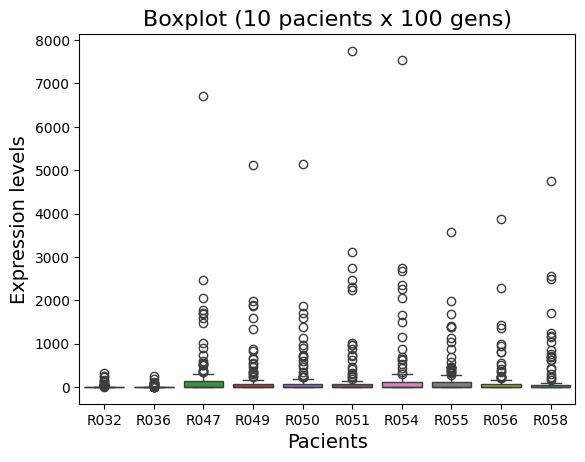

In [25]:
first_ten = df.iloc[:10, :100]
sns.boxplot(first_ten.T)
plt.title("Boxplot (10 pacients x 100 gens)", fontsize=16)
plt.xlabel("Pacients", fontsize=14)
plt.ylabel("Expression levels", fontsize=14)

# 2. Dades trandormades I

- 20 pacients : 10 sans vs 10 diabetes tipus 2
- Dades Transformades amb log2 + 1

In [34]:
df_filtered["Condició"] = conditions
df_sa = df_filtered[df_filtered["Condició"] == "SA"]  # Pacients sans
df_type2 = df_filtered[df_filtered["Condició"] == "Type2"]  # Pacients amb diabetis tipus 2

# Agafem primeres 10 de cada condició
df_sa_sample=df_sa.iloc[:10]
df_type2_sample=df_type2.iloc[:10]

# Concatenem en un mateix df les dos condicions = 20 pacients
df_combined = pd.concat([df_sa_sample, df_type2_sample], axis=0)
df_combined_reset = df_combined.reset_index()  # sense index record_id
gene_columns = df_combined_reset.columns[1:-1] # només les columnes de gens

df_combined

/var/folders/b8/rdg06f9d2dq8b5jy2qvvln500000gn/T/ipykernel_15611/3434846002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Condició"] = conditions


,10,100,1000,10000,10001,10002,10003,100033411,100037417,10004,...,9987,9988,9989,999,9990,9991,9992,9993,9994,Condició
record_id,,,,,,,,,,,,,,,,,,,,,
R032,0,2,0,35,3,1,0,0,0,2,...,2,3,2957,38,4,86,0,13,394,SA
R036,0,0,0,18,0,1,0,0,0,6,...,0,0,2720,12,0,36,0,2,335,SA
R047,0,93,901,1682,515,2,127,0,41,37,...,13698,2033,3402,19544,419,8414,0,2368,239,SA
R049,4,102,58,835,528,2,58,0,33,16,...,14431,1399,3003,16453,357,8941,0,2424,312,SA
R050,0,59,511,963,463,1,59,0,45,39,...,12897,1303,2333,14621,264,5199,0,2041,105,SA
R051,0,88,140,719,975,3,6,0,46,11,...,26523,1613,5805,25919,572,10194,0,5157,376,SA
R055,0,37,1037,1391,453,0,273,0,3,44,...,12724,1466,2577,14029,220,6103,1,1998,208,SA
R056,0,71,233,813,335,13,106,0,32,33,...,8801,886,2706,15036,291,3159,0,2427,86,SA
R058,0,39,695,1244,629,0,80,0,8,29,...,16038,1592,3310,11450,544,20974,0,1891,605,SA


In [36]:
# Aplicar la transformació log2 + 1 
df_combined_reset[gene_columns] = np.log((df_combined_reset[gene_columns])+1)  

# Passar a format long
df_long = df_combined_reset.melt(id_vars=["record_id", "Condició"], var_name="Gene", value_name="Expression")

df_sa = df_long[df_long['Condició'] == 'SA']
df_type2 = df_long[df_long['Condició'] == 'Type2']

df_combined_sample = pd.concat([df_sa, df_type2])

df_combined_sample

,record_id,Condició,Gene,Expression
0,R032,SA,10,0.000000
1,R036,SA,10,0.000000
2,R047,SA,10,0.000000
3,R049,SA,10,0.959135
4,R050,SA,10,0.000000
...,...,...,...,...
393015,R093,Type2,9994,1.946465
393016,R191,Type2,9994,1.844965
393017,R219,Type2,9994,1.827827
393018,R240,Type2,9994,1.723689


## 2.1 Boxplot

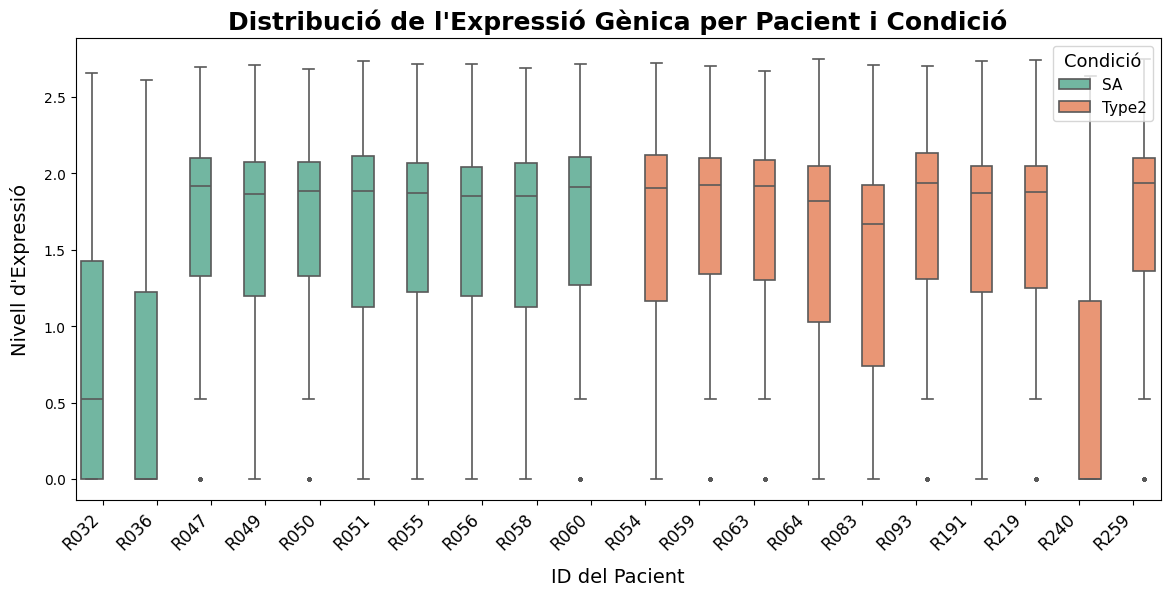

In [39]:
# Boxplot

plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_combined_sample,
    x="record_id",
    y="Expression",
    hue="Condició",
    dodge=True,
    palette="Set2",  # Colors més suaus i diferenciats
    linewidth=1.2,  # Gruix de les línies del boxplot
    fliersize=2  # Mida dels outliers perquè no sobresurtin massa
)

plt.title("Distribució de l'Expressió Gènica per Pacient i Condició", fontsize=18, fontweight='bold')
plt.xlabel("ID del Pacient", fontsize=14, labelpad=10)
plt.ylabel("Nivell d'Expressió", fontsize=14, labelpad=10)

plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotar els noms dels pacients
plt.legend(title="Condició", title_fontsize=13, fontsize=11, loc="upper right", frameon=True)

plt.show()



# 2.2 Histograma 

In [43]:
#Sa
r032 = df_combined_sample[df_combined_sample["record_id"] == "R032"]
r036 = df_combined_sample[df_combined_sample["record_id"] == "R036"]
r047 = df_combined_sample[df_combined_sample["record_id"] == "R047"]
r049 = df_combined_sample[df_combined_sample["record_id"] == "R049"]
r050 = df_combined_sample[df_combined_sample["record_id"] == "R050"]
r051 = df_combined_sample[df_combined_sample["record_id"] == "R051"]
r055 = df_combined_sample[df_combined_sample["record_id"] == "R055"]
r056 = df_combined_sample[df_combined_sample["record_id"] == "R056"]
r058 = df_combined_sample[df_combined_sample["record_id"] == "R058"]
r060 = df_combined_sample[df_combined_sample["record_id"] == "R060"]

#Type 2
r054 = df_combined_sample[df_combined_sample["record_id"] == "R054"]
r059 = df_combined_sample[df_combined_sample["record_id"] == "R059"]
r063 = df_combined_sample[df_combined_sample["record_id"] == "R063"]
r064 = df_combined_sample[df_combined_sample["record_id"] == "R064"]
r083 = df_combined_sample[df_combined_sample["record_id"] == "R083"]
r093 = df_combined_sample[df_combined_sample["record_id"] == "R093"]
r191 = df_combined_sample[df_combined_sample["record_id"] == "R191"]
r219 = df_combined_sample[df_combined_sample["record_id"] == "R219"]
r240 = df_combined_sample[df_combined_sample["record_id"] == "R240"]
r259 = df_combined_sample[df_combined_sample["record_id"] == "R259"]

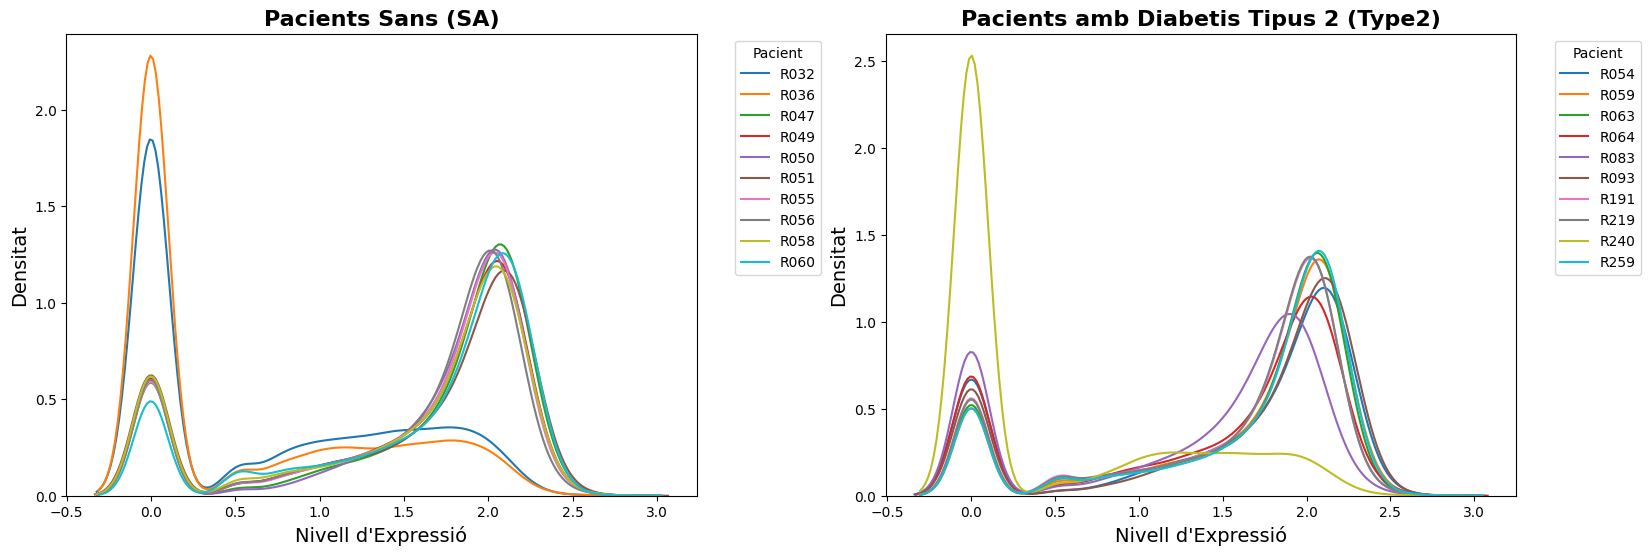

In [47]:
# Crear subplots amb dues columnes
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Pacients sans (SA)
sns.kdeplot(r032["Expression"], label="R032", color="#1f77b4", ax=axes[0])  # Blau
sns.kdeplot(r036["Expression"], label="R036", color="#ff7f0e", ax=axes[0])  # Taronja
sns.kdeplot(r047["Expression"], label="R047", color="#2ca02c", ax=axes[0])  # Verd
sns.kdeplot(r049["Expression"], label="R049", color="#d62728", ax=axes[0])  # Vermell
sns.kdeplot(r050["Expression"], label="R050", color="#9467bd", ax=axes[0])  # Morat
sns.kdeplot(r051["Expression"], label="R051", color="#8c564b", ax=axes[0])  # Marró
sns.kdeplot(r055["Expression"], label="R055", color="#e377c2", ax=axes[0])  # Rosa
sns.kdeplot(r056["Expression"], label="R056", color="#7f7f7f", ax=axes[0])  # Gris
sns.kdeplot(r058["Expression"], label="R058", color="#bcbd22", ax=axes[0])  # Groc
sns.kdeplot(r060["Expression"], label="R060", color="#17becf", ax=axes[0])  # Cian

# Configuració del primer subplot
axes[0].legend(title="Pacient", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_title("Pacients Sans (SA)", fontsize=16, fontweight="bold")
axes[0].set_xlabel("Nivell d'Expressió", fontsize=14)
axes[0].set_ylabel("Densitat", fontsize=14)

# Pacients amb diabetis tipus 2 (Type2)
sns.kdeplot(r054["Expression"], label="R054", color="#1f77b4", ax=axes[1])  # Blau
sns.kdeplot(r059["Expression"], label="R059", color="#ff7f0e", ax=axes[1])  # Taronja
sns.kdeplot(r063["Expression"], label="R063", color="#2ca02c", ax=axes[1])  # Verd
sns.kdeplot(r064["Expression"], label="R064", color="#d62728", ax=axes[1])  # Vermell
sns.kdeplot(r083["Expression"], label="R083", color="#9467bd", ax=axes[1])  # Morat
sns.kdeplot(r093["Expression"], label="R093", color="#8c564b", ax=axes[1])  # Marró
sns.kdeplot(r191["Expression"], label="R191", color="#e377c2", ax=axes[1])  # Rosa
sns.kdeplot(r219["Expression"], label="R219", color="#7f7f7f", ax=axes[1])  # Gris
sns.kdeplot(r240["Expression"], label="R240", color="#bcbd22", ax=axes[1])  # Groc
sns.kdeplot(r259["Expression"], label="R259", color="#17becf", ax=axes[1])  # Cian

# Configuració del segon subplot
axes[1].legend(title="Pacient", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_title("Pacients amb Diabetis Tipus 2 (Type2)", fontsize=16, fontweight="bold")
axes[1].set_xlabel("Nivell d'Expressió", fontsize=14)
axes[1].set_ylabel("Densitat", fontsize=14)

plt.subplots_adjust(wspace=0.3, right=0.85)
plt.show()


# 2.3 PCA

In [54]:
df_combined_reset = df_combined.reset_index()
expression = df_combined_reset.drop(columns=["Condició", "record_id"])  
condition = df_combined_reset["Condició"] 

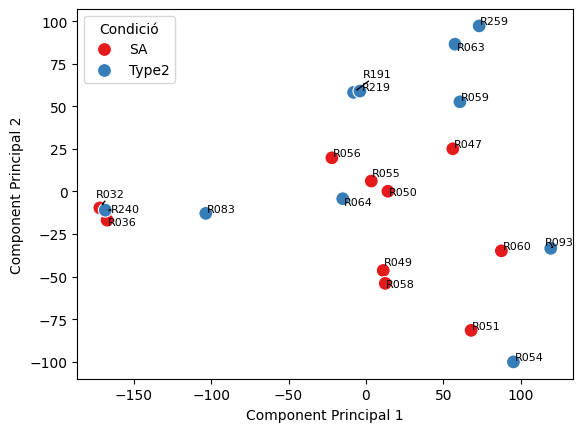

In [55]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(expression)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=["Component Principal 1", "Component Principal 2"])
df_pca["Condició"] = condition
df_pca["record_id"] = df_combined_reset["record_id"]

sns.scatterplot(x="Component Principal 1", y="Component Principal 2", hue="Condició", data=df_pca, s=100, palette="Set1")

texts = []
for i in range(df_pca.shape[0]):
    text = plt.text(df_pca["Component Principal 1"].iloc[i], 
                    df_pca["Component Principal 2"].iloc[i], 
                    df_pca["record_id"].iloc[i], 
                    fontsize=8)
    texts.append(text)


adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black'))

plt.show()


# 2.4 UMAP

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


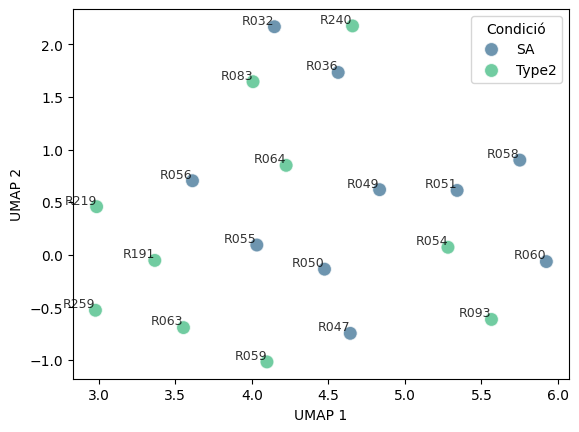

In [58]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)  


df_umap = pd.DataFrame(X_umap, columns=["UMAP 1", "UMAP 2"])
df_umap["Condició"] = condition  
df_umap["record_id"] = df_combined_reset["record_id"]

sns.scatterplot(x="UMAP 1", y="UMAP 2", hue="Condició", data=df_umap, palette="viridis", s=100, alpha=0.7)

for i, row in df_umap.iterrows():
    plt.text(row["UMAP 1"], row["UMAP 2"], df_umap["record_id"][i], fontsize=9, alpha=0.8, 
             ha='right', va='bottom')

## 3. Dades transformades II


- Per evitar valors 0, s'eliminen els valors de 20é percentil
- S'agafen els 10 primers de cada condició-> 20 pacients

In [70]:
# Definir el percentil
percentil = 20

# Calcular el percentil per a cada gen
percentil_value = df_values.apply(lambda x: np.percentile(x, percentil), axis=0)

# Calcular la proporció de 0 per a cada gen
zero_proportion = (df_values == 0).mean(axis=0)

# Filtrar gens que tinguin menys del 20% de zeros i que tinguin algun valor per sobre del percentil
df_20 = df_values.loc[:, (zero_proportion < 0.2) & (df_values > percentil_value).any(axis=0)]

# Tornar a filtrar eliminant columnes que tinguin només zeros
df_filtered_20 = df_20.loc[:, (df_20 != 0).any(axis=0)]

# Afegir la condició al dataframe filtrat
df_filtered_20["Condició"] = conditions.values

df_filtered_20

,100,1000,10000,10001,10003,100037417,10004,100048912,10005,10006,...,9986,9987,9988,9989,999,9990,9991,9993,9994,Condició
record_id,,,,,,,,,,,,,,,,,,,,,
R032,2,0,35,3,0,0,2,20,230,0,...,1,2,3,2957,38,4,86,13,394,SA
R036,0,0,18,0,0,0,6,6,64,0,...,0,0,0,2720,12,0,36,2,335,SA
R047,93,901,1682,515,127,41,37,34,348,6713,...,453,13698,2033,3402,19544,419,8414,2368,239,SA
R049,102,58,835,528,58,33,16,14,235,5116,...,594,14431,1399,3003,16453,357,8941,2424,312,SA
R050,59,511,963,463,59,45,39,11,219,5137,...,528,12897,1303,2333,14621,264,5199,2041,105,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R419,16,318,2005,235,123,25,46,62,198,704,...,199,3502,1250,849,3355,494,2044,2513,352,SA
R420,28,424,1478,106,251,16,38,76,177,982,...,229,3544,997,984,4471,447,2470,2238,232,SA
R421,42,253,1634,123,405,13,63,91,174,974,...,251,4822,1146,1118,3492,455,2630,2374,222,SA


In [71]:
#Agafar 10 de cada condició i concatenar
df_sa_20 = df_filtered_20[df_filtered_20["Condició"] == "SA"]  # Pacients sans
df_type2_20 = df_filtered_20[df_filtered_20["Condició"] == "Type2"]  # Pacients amb diabetis tipus 2

df_sa_sample_20=df_sa_20.iloc[:10]
df_type2_sample_20=df_type2_20.iloc[:10]

# Concatenem en un mateix df les dos condicions = 20 pacients
df_combined_20 = pd.concat([df_sa_sample_20, df_type2_sample_20], axis=0)
df_combined_reset_20 = df_combined_20.reset_index()  # sense index record_id
gene_columns_20 = df_combined_reset_20.columns[1:-1] # només les columnes de gens

df_combined_20

,100,1000,10000,10001,10003,100037417,10004,100048912,10005,10006,...,9986,9987,9988,9989,999,9990,9991,9993,9994,Condició
record_id,,,,,,,,,,,,,,,,,,,,,
R032,2,0,35,3,0,0,2,20,230,0,...,1,2,3,2957,38,4,86,13,394,SA
R036,0,0,18,0,0,0,6,6,64,0,...,0,0,0,2720,12,0,36,2,335,SA
R047,93,901,1682,515,127,41,37,34,348,6713,...,453,13698,2033,3402,19544,419,8414,2368,239,SA
R049,102,58,835,528,58,33,16,14,235,5116,...,594,14431,1399,3003,16453,357,8941,2424,312,SA
R050,59,511,963,463,59,45,39,11,219,5137,...,528,12897,1303,2333,14621,264,5199,2041,105,SA
R051,88,140,719,975,6,46,11,6,327,7750,...,997,26523,1613,5805,25919,572,10194,5157,376,SA
R055,37,1037,1391,453,273,3,44,19,430,3573,...,296,12724,1466,2577,14029,220,6103,1998,208,SA
R056,71,233,813,335,106,32,33,3,226,3880,...,298,8801,886,2706,15036,291,3159,2427,86,SA
R058,39,695,1244,629,80,8,29,35,200,4750,...,392,16038,1592,3310,11450,544,20974,1891,605,SA


In [78]:
# Aplicar la transformació log2 només a les columnes numèriques d'expressions gèniques
df_combined_reset_20[gene_columns_20] = np.log((df_combined_reset_20[gene_columns_20])+1)
# Passar a format long
df_long_20 = df_combined_reset_20.melt(id_vars=["record_id", "Condició"], var_name="Gene", value_name="Expression")

df_sa_20 = df_long_20[df_long_20['Condició'] == 'SA']
df_type2_20 = df_long_20[df_long_20['Condició'] == 'Type2']

df_combined_sample_20 = pd.concat([df_sa_20, df_type2_20])

df_combined_sample_20

,record_id,Condició,Gene,Expression
0,R032,SA,100,1.098612
1,R036,SA,100,0.000000
2,R047,SA,100,4.543295
3,R049,SA,100,4.634729
4,R050,SA,100,4.094345
...,...,...,...,...
308335,R093,Type2,9994,6.003887
308336,R191,Type2,9994,5.327876
308337,R219,Type2,9994,5.220356
308338,R240,Type2,9994,4.605170


## 3.1 Boxplot

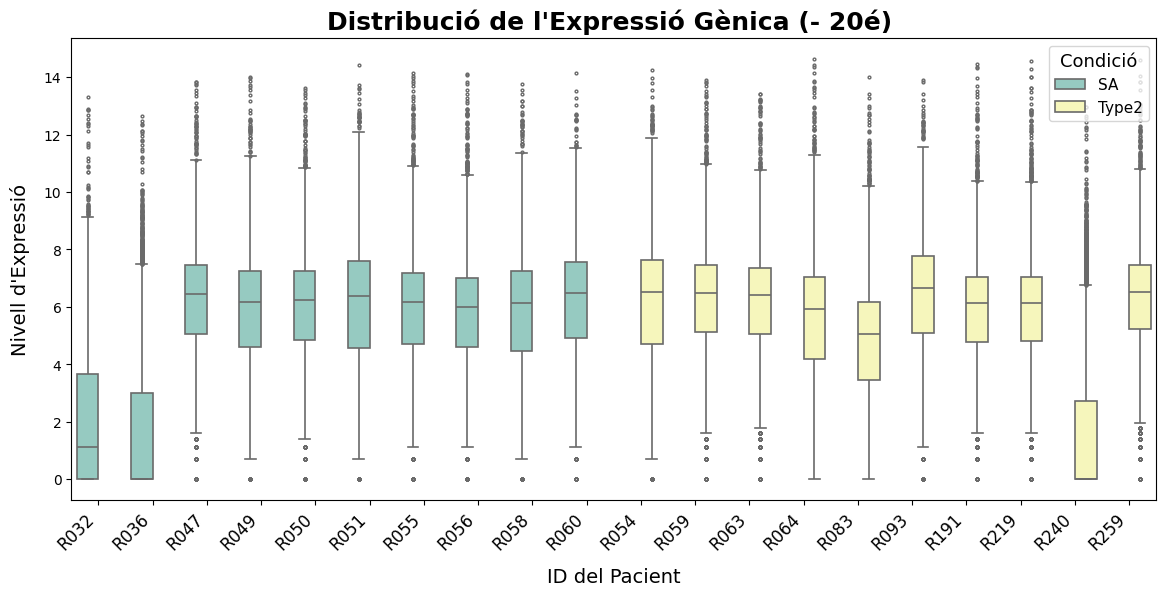

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_combined_sample_20,
    x="record_id",
    y="Expression",
    hue="Condició",
    dodge=True,
    palette="Set3",  
    linewidth=1.2,  # Gruix de les línies del boxplot
    fliersize=2  # Mida dels outliers perquè no sobresurtin massa
)

plt.title("Distribució de l'Expressió Gènica (- 20é) ", fontsize=18, fontweight='bold')
plt.xlabel("ID del Pacient", fontsize=14, labelpad=10)
plt.ylabel("Nivell d'Expressió", fontsize=14, labelpad=10)

plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotar els noms dels pacients
plt.legend(title="Condició", title_fontsize=13, fontsize=11, loc="upper right", frameon=True)

plt.show()

S'observa la mateixa distribució que en nomes aplicar el log2 +1 perqué s'enten que es parla dels mateixos pacients uqe no estan afectats per aquesta 2a transformació
